# Import libraries

In [118]:
import numpy as np 
import pandas as pd  #for dataframe
import tweepy#for pulling tweets?
from textblob import TextBlob #tokenizing tweets
import matplotlib.pyplot as plt #for data visualization 

# Authentication keys

In [166]:
api_key = ''
api_secret_key = ''
access_token = ''
access_token_key = ''

auth = tw.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_key)
api = tw.API(auth)

# Build dataframe with sentiment analysis (column 1) and tweet (column 2)

### trudeau's dataframe

In [167]:
query = 'justin+trudeau -filter:retweets'
max_tweets = 200
liberal = [status for status in tw.Cursor(api.search, q=query).items(max_tweets)]

liberal = [] 
last_id = -1 

while len(liberal) < max_tweets:
   count = max_tweets - len(liberal)
   try:
       new_tweets = api.search(q=query, count=count, lang='en', max_id=str(last_id - 1))
       if not new_tweets:
           break
       new_tweets_text = [tweet.text for tweet in new_tweets]
       liberal.extend(new_tweets_text)
       last_id = new_tweets[-1].id
   except tw.TweepError as e:
       # depending on TweepError.code, one may want to retry or wait
       # to keep things simple, we will give up on an error
       break

sentiment_objects = [TextBlob(tweet) for tweet in liberal]
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_df = pd.DataFrame(sentiment_values, columns=["Polarity", "Justin Trudeau"])
#print (sentiment_df)

### scheer's dataframe

In [168]:
query = "andrew+scheer -filter:retweets"
max_tweets = 200
conservative = [status for status in tw.Cursor(api.search, q=query).items(max_tweets)]

conservative = [] 
last_id = -1 

while len(conservative) < max_tweets:
   count = max_tweets - len(conservative)
   try:
       new_tweets = api.search(q=query, count=count, lang='en', max_id=str(last_id - 1))
       if not new_tweets:
           break
       new_tweets_text = [tweet.text for tweet in new_tweets]
       conservative.extend(new_tweets_text)
       last_id = new_tweets[-1].id
   except tw.TweepError as e:
       # depending on TweepError.code, one may want to retry or wait
       # to keep things simple, we will give up on an error
       break

sentiment_objects = [TextBlob(tweet) for tweet in conservative]
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_df_two = pd.DataFrame(sentiment_values, columns=["Polarity", "Andrew Scheer"])
#print (sentiment_df_two)

### singh's dataframe

In [169]:
query = "jagmeet+singh -filter:retweets"
max_tweets = 200
ndp = [status for status in tw.Cursor(api.search, q=query).items(max_tweets)]

ndp = [] 
last_id = -1 

while len(ndp) < max_tweets:
   count = max_tweets - len(ndp)
   try:
       new_tweets = api.search(q=query, count=count, lang='en', max_id=str(last_id - 1))
       if not new_tweets:
           break
       new_tweets_text = [tweet.text for tweet in new_tweets]
       ndp.extend(new_tweets_text)
       last_id = new_tweets[-1].id
   except tw.TweepError as e:
       # depending on TweepError.code, one may want to retry or wait
       # to keep things simple, we will give up on an error
       break

sentiment_objects = [TextBlob(tweet) for tweet in ndp]
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_df_three = pd.DataFrame(sentiment_values, columns=["Polarity", "Jagmeet Singh"])
#print (sentiment_df_three)

# getting average sentiment for the party leaders

In [170]:
trudeau_sent = sentiment_df['Polarity'].mean()
print (round(trudeau_sent, 4))
andrew_sent = sentiment_df_two['Polarity'].mean()
print (round (andrew_sent, 4))
jagmeet_sent = sentiment_df_three['Polarity'].mean()
print (round (jagmeet_sent, 4))

0.039
0.037
0.0998


# bar graphs of how many tweets are negative to positive

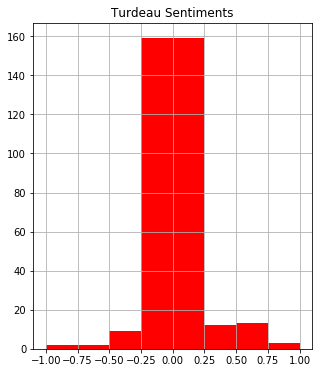

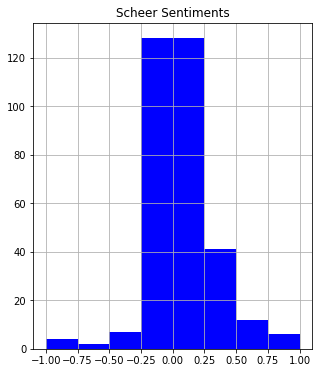

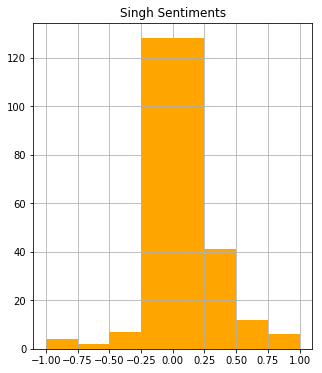

In [171]:
fig, ax = plt.subplots(figsize=(5, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="red")

plt.title("Turdeau Sentiments")


fig, ax = plt.subplots(figsize=(5, 6))

# Plot histogram of the polarity values
sentiment_df_three.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="blue")

plt.title("Scheer Sentiments")


fig, ax = plt.subplots(figsize=(5, 6))

# Plot histogram of the polarity values
sentiment_df_three.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="orange")

plt.title("Singh Sentiments")
plt.show()

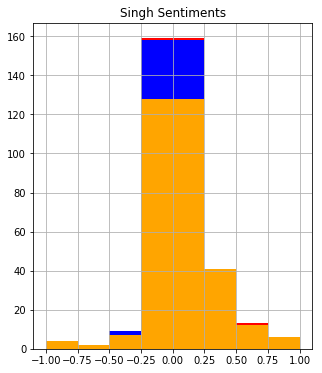

In [172]:
fig, ax = plt.subplots(figsize=(5, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="red")
sentiment_df_two.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="blue")
sentiment_df_three.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="orange")

plt.title("Turdeau Sentiments")
plt.title("Scheer Sentiments")
plt.title("Singh Sentiments")
plt.show()

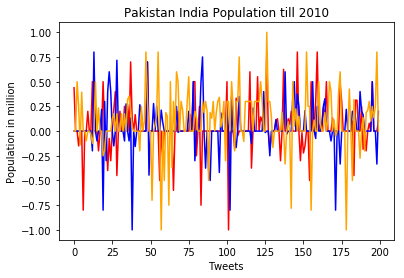

In [173]:
plt.plot(sentiment_df['Polarity'], color='red')
plt.plot(sentiment_df_two['Polarity'], color='blue')
plt.plot(sentiment_df_three['Polarity'], color='orange')
#plt.plot(sentiment_df_three['Polarity'], color='orange')
plt.xlabel('Tweets')
plt.ylabel('Population in million')
plt.title('Pakistan India Population till 2010')
plt.show()

<BarContainer object of 3 artists>

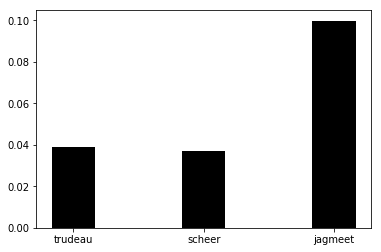

In [183]:
y = [trudeau_sent, andrew_sent, jagmeet_sent]
x = ['trudeau', 'scheer', 'jagmeet']
width = .5/1.5
plt.bar(x, y, width, color="black")
